## <center>Predicting Student Success in Math classes</center>
Class 5 Capstone Project<br>
Jen Morgan<br>
December 2018<br>

<b>Dataset:</b>  Student Performance Data Set. __[Analysis will be performed on the math student data set only.](https://archive.ics.uci.edu/ml/datasets/Student+Performance)__  <br>
<b>Dataset information and attributes:</b> The dataset was collected from secondary school students in two Portuguese schools. It contains 33 attributes including demographic information and social, familial, and school related features. It also includes three student grade attributes representing the first period grade (G1), second period grade (G2), and the final grade (G3). The grade attributes are all highly correlated with one another. <br>
<b>Why this data set?</b> Working in higher education means that a large part of my job is predicting student performance and trying to determine providing treatment methods to improve that performance. This data set is directly related to current and future work projects.<br>
Approach: I plan to treat this as a multiclass classification problem. Ultimately, the dependent variable will be the final grade prediction converted from a 20 point integer level into a 5-level class of letter grades.
<br>
<h2> Steps:</h2>

<b><a href='#Import and Pre-Process data'> Import and Pre-process data</a><br><br>
<a href='#EDA'> Exploratory Data Analysis and Visualizations</a></b>
 In this section, I created the dependant variable and another pass/fail variable that will aid in visualizing a broad overview of student performance. Through visualizations, correlations, distributions, and other plots, I will gain an understanding of the data set as a whole and of each of the features and their relationships to each other and to the dependant variable. <br><br>
<b><a href='#features'> Feature Selection</a></b>
 In this section I created two new data sets for modeling. One data set included integer encoding of the categorical variables, and for the other I used get_dummies to handle the categorical variables. did some integer encoding to the categorical variables and also used get dummies for the categorical variables. I used standard_scaler to scale the variables since absences, age, and the grades were on a different scale than the other variables. I split each of the two new data sets into training and testing sets to prepare for model fitting.<br><br>
<b><a href='#Modeling'> Build and test classification models</a></b>
 In this section I tested each data set on five different classification models.<br><br>
<b><a href='#tuning'> Tune Parameters, Model Fit, Cross Validate</a></b>
 Using the two highest performing models from the previous section, I used GridSearch to tune the model parameters, fit the models, and cross validated the results to determine the strongest model. This section concludes by reviewing the feature importance of the chosen model. <br><br>
<b><a href='#conclude'> Conclusions</a></b><br>
 

## Import libraries

In [1]:
# imports
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Pre-processing imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing, metrics
import scipy.stats as stats

In [202]:
#PCA import
from sklearn.decomposition import PCA

In [124]:
#Import models
#Decision trees
from sklearn import tree

#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#K-Nearest Neighbor
from sklearn import neighbors, datasets

#KNeighbors
from sklearn.neighbors import KNeighborsClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#C-Support Vector Classification
from sklearn.svm import SVC

In [4]:
#Import model metrics
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,
accuracy_score,cohen_kappa_score

# cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [5]:
#visualizations
from pandas import crosstab
from IPython.display import display # Allows the use of display() for DataFrames
import re

<a id='Import and Pre-Process data'>
## Import and Pre-Process Data</a>

In [52]:
math = pd.read_csv('student-mat.csv')

In [53]:
math.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#Check numeric features 
math.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


<blockquote> Age, absences, and G1, G2, G3 on a different scale than the other values. Will need to consider using standard scaler.

In [9]:
#Data Shape- get the number of observations/attributes
print ('math:',math.shape)

math: (395, 33)


In [10]:
### Determine categorical features
categorical_features = (math.select_dtypes(include=['object']).columns.values)
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [54]:
#Convert objects to categorical data types
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    math[col] = math[col].astype('category')

In [12]:
### Determine numeric features
numeric_features = math.select_dtypes(include = ['float64', 'int64']).columns.values
numeric_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

<blockquote> All of the numeric features except age, travel time, study time, failures, G1, G2, G3, absences will need to be converted 
to categorical features for better analysis a little later.

<a id='EDA'>
## Exploratory Data Analysis & Visualizations</a>

#### Explore student performance (y variable)
- Create y variable and another variable to assist in exploration

In [13]:
#Create to assist with some broad visualizations; will be dropped before model fitting
# Pass/Fail Variable 
math['pass'] = 'na'
math.loc[(math.G3 >=10) & (math.G3<=20), 'pass'] = 2
math.loc[(math.G3 >=0) & (math.G3<=9), 'pass'] = 1

In [55]:
#Engineer Y variable (will need to convert to category)
# 5 level integer encoded variable that corresponds to letter grades of G3
# A=5; B=4; C=3; D=2; F=1
math['performance'] = 'na'
math.loc[(math.G3 >=16) & (math.G3<=20), 'performance'] = 5
math.loc[(math.G3 >=14) & (math.G3<=15), 'performance'] = 4
math.loc[(math.G3 >=12) & (math.G3<=13), 'performance'] = 3
math.loc[(math.G3 >=10) & (math.G3<=11), 'performance'] = 2
math.loc[(math.G3 >=0) & (math.G3<=9), 'performance'] = 1

In [10]:
#Get exact counts of pass/fail in Math pass=2; fail=1 
math['pass'].value_counts()

2    265
1    130
Name: pass, dtype: int64

33% of the students failed 

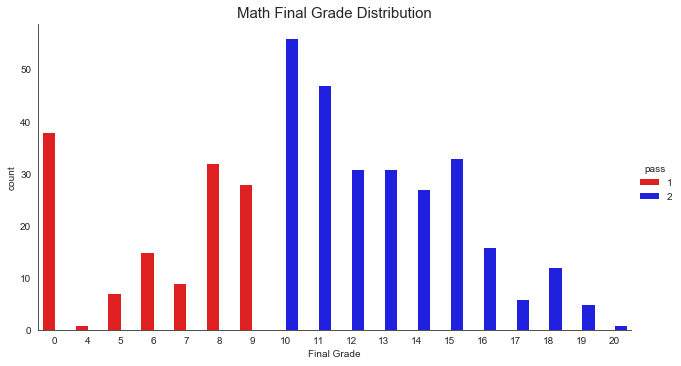

In [12]:
# plot Final Grade (G3)/pass
ms = sns.catplot('G3', data=math, palette= ['red','blue'], hue= 'pass', 
                    kind='count', aspect =1.75)
plt.title('Math Final Grade Distribution', fontsize= 15)
ms.set_xlabels('Final Grade')

In [17]:
#Get exact counts of performance
math['performance'].value_counts()

1    130
2    103
3     62
4     60
5     40
Name: performance, dtype: int64

26% of the students earned a grade of D<br>
16% of the students earned a grade of C<br>
15% of the students earned a grade of B<br>
10% of the students earned a grade of A<br>

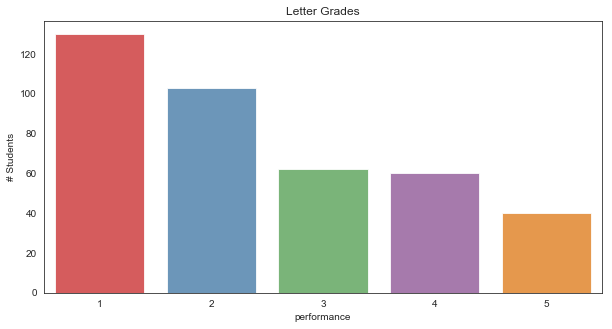

In [13]:
#Plot performance
sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(math['performance'], alpha =.80, palette= "Set1")
plt.title('Letter Grades')
plt.ylabel('# Students')
plt.show()

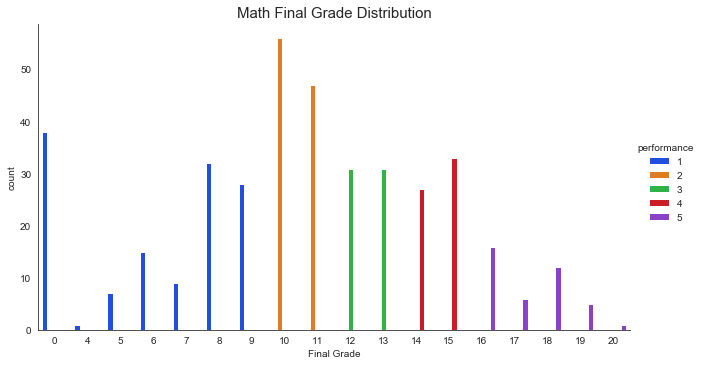

In [14]:
# plot Final Grade (G3)/performance
ms = sns.catplot('G3', data=math, palette = "bright", hue= 'performance', 
                    kind='count', aspect =1.75)
plt.title('Math Final Grade Distribution', fontsize= 15)
ms.set_xlabels('Final Grade')

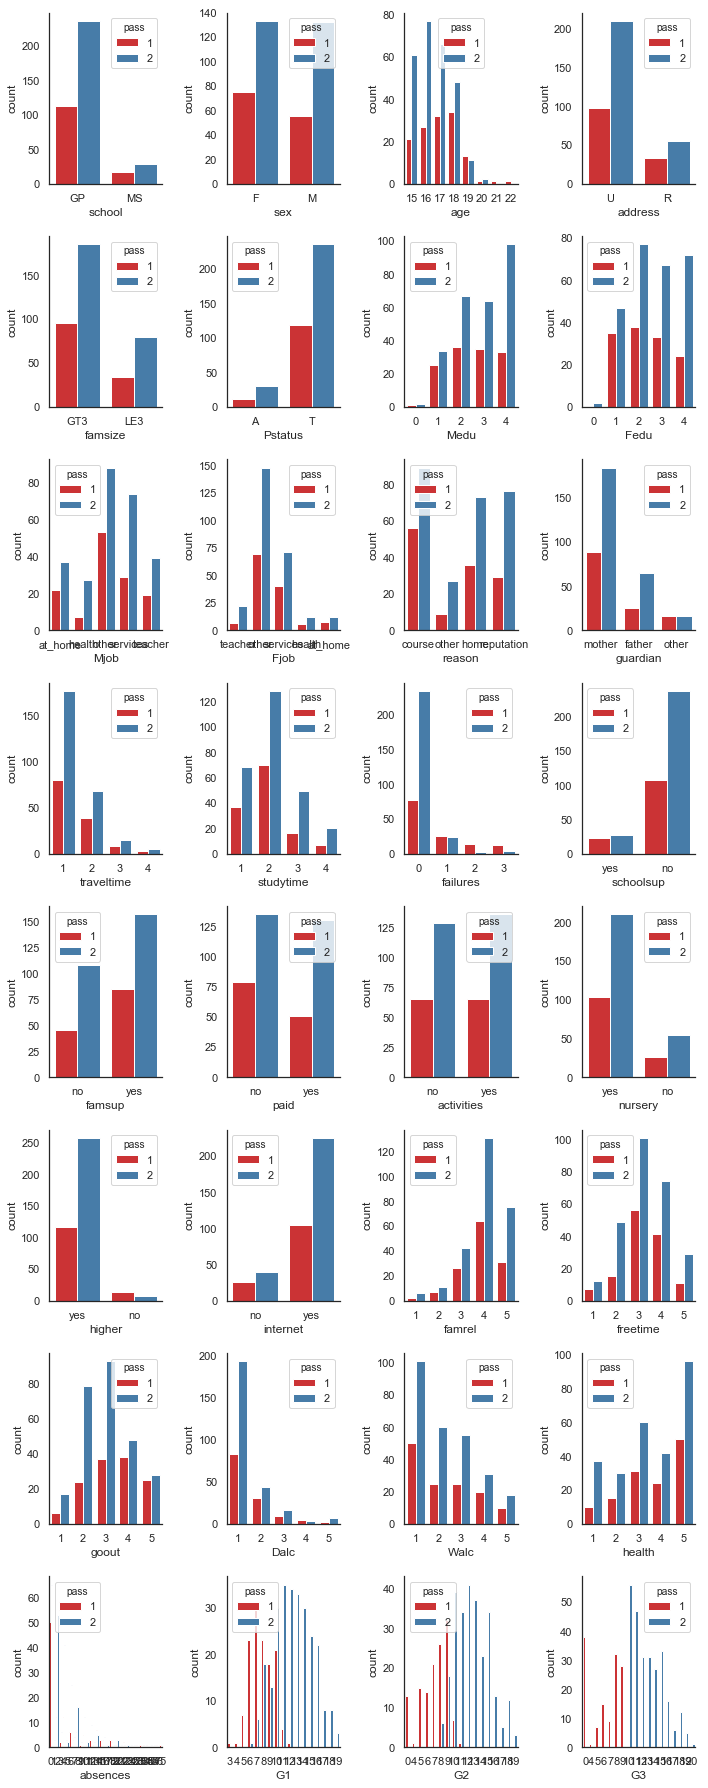

In [15]:
# Look at absolute values of passing & failing to 
## get a general sense of the students/data
sns.set(style="white", palette = "Set1", color_codes=True)
f, axes = plt.subplots(8, 4, figsize=(10,25))
sns.despine(right=True)
sns.countplot(x='school', hue= 'pass',  ax=axes[0, 0], data = math)
sns.countplot(x='sex', hue= 'pass',  ax=axes[0, 1], data = math)
sns.countplot(x='age', hue= 'pass',  ax=axes[0, 2], data = math)
sns.countplot(x='address', hue= 'pass',  ax=axes[0, 3], data = math)
sns.countplot(x='famsize', hue= 'pass',  ax=axes[1, 0], data = math)
sns.countplot(x='Pstatus', hue= 'pass',  ax=axes[1, 1], data = math)
sns.countplot(x='Medu',      hue= 'pass',  ax=axes[1, 2], data = math)
sns.countplot(x='Fedu',      hue= 'pass',  ax=axes[1, 3], data = math)
sns.countplot(x='Mjob',      hue= 'pass',  ax=axes[2, 0], data = math)
sns.countplot(x='Fjob',      hue= 'pass',  ax=axes[2, 1], data = math)
sns.countplot(x='reason', hue= 'pass',  ax=axes[2, 2], data = math)
sns.countplot(x='guardian', hue= 'pass',  ax=axes[2, 3], data = math)
sns.countplot(x='traveltime',hue= 'pass',  ax=axes[3, 0], data = math)
sns.countplot(x='studytime', hue= 'pass',  ax=axes[3, 1], data = math)
sns.countplot(x='failures',  hue= 'pass',  ax=axes[3, 2], data = math)
sns.countplot(x='schoolsup', hue= 'pass',  ax=axes[3, 3], data = math)
sns.countplot(x='famsup', hue= 'pass',  ax=axes[4, 0], data = math)
sns.countplot(x='paid',  hue= 'pass',  ax=axes[4, 1], data = math)
sns.countplot(x='activities',   hue= 'pass',  ax=axes[4, 2], data = math)
sns.countplot(x='nursery',       hue= 'pass',  ax=axes[4, 3], data = math)
sns.countplot(x='higher',      hue= 'pass',  ax=axes[5, 0], data = math)
sns.countplot(x='internet',      hue= 'pass',  ax=axes[5, 1], data = math)
sns.countplot(x='famrel',    hue= 'pass',  ax=axes[5, 2], data = math)
sns.countplot(x='freetime',  hue= 'pass',  ax=axes[5, 3], data = math)
sns.countplot(x='goout',     hue= 'pass',  ax=axes[6, 0], data = math)
sns.countplot(x='Dalc',     hue= 'pass',   ax=axes[6, 1], data = math)
sns.countplot(x='Walc',      hue= 'pass',  ax=axes[6, 2], data = math)
sns.countplot(x='health',    hue= 'pass',  ax=axes[6, 3], data = math)
sns.countplot(x='absences',  hue= 'pass',  ax=axes[7, 0], data = math)
sns.countplot(x='G1',  hue= 'pass',  ax=axes[7, 1], data = math)
sns.countplot(x='G2',  hue= 'pass',  ax=axes[7, 2], data = math)
sns.countplot(x='G3',  hue= 'pass',  ax=axes[7, 3], data = math)

plt.tight_layout()

### Detailed Feature Analysis

In [30]:
#Numeric Summary
math.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0
pass,395.0,1.670886,0.470487,1.0,1.0,2.0,2.0,2.0
performance,395.0,2.435443,1.349096,1.0,1.0,2.0,4.0,5.0


#### Create correlation map to check relationships between numeric features
- Positive Correlation  +1
- Negative Correlaion -1
- No Correlation  0

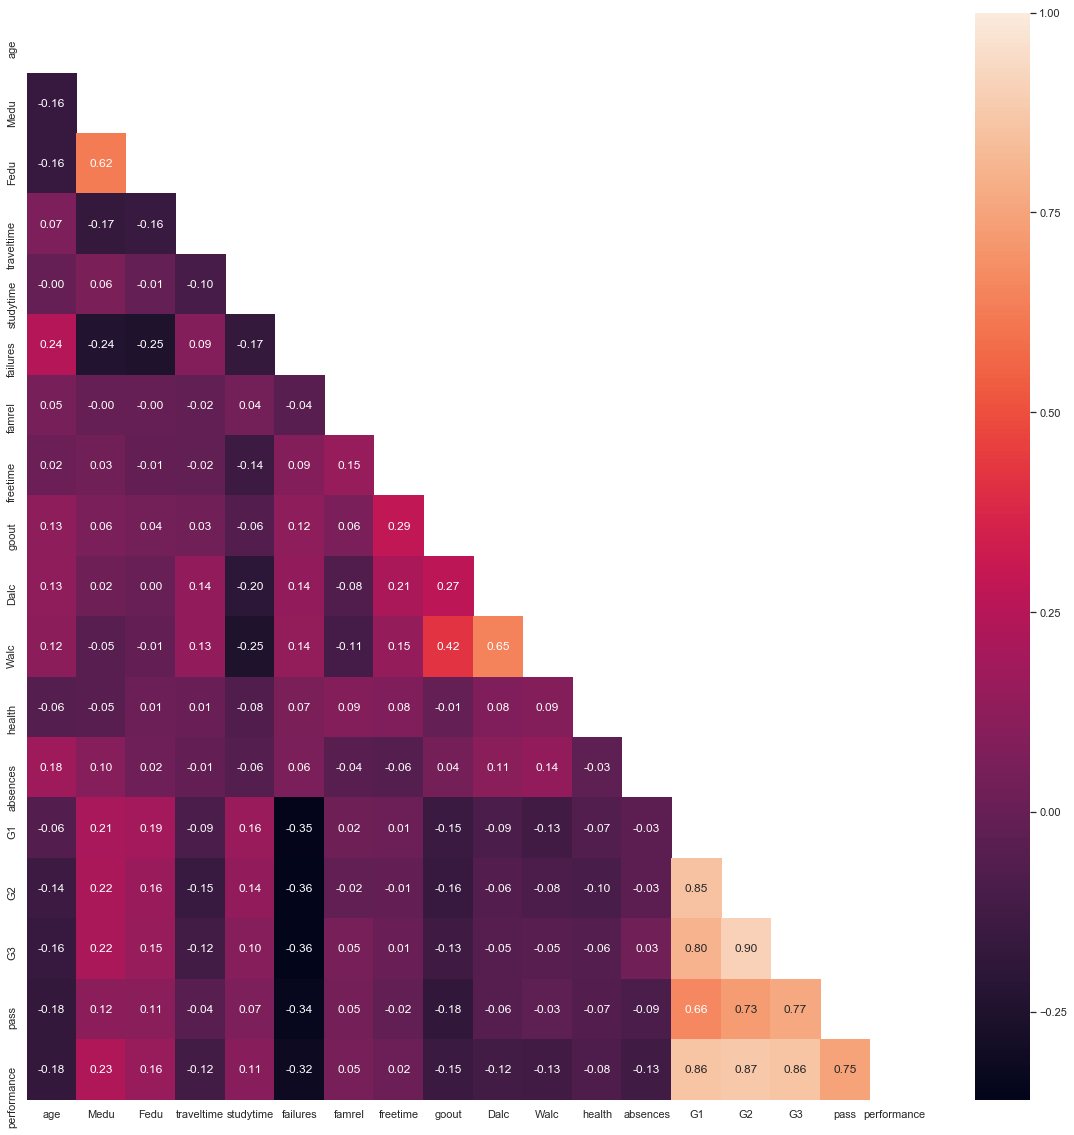

In [25]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat,annot = True,mask = mask, fmt = ".2f",cbar = True)

variable_correlations = math.corr()
#variable_correlations
heat_map(variable_correlations)

- ignoring pass variable here since it will not be used in modeling
- Positive Correlations shown from most highly to least (included here are correlations from .90 to .40)
   - G3 (final grade) and G2 then G1
   - Performance (y variable) very highly correlated to G2, G3, and G1
   - G2 (second period grade) and G1
   - Weekend alcohol consumption & Weekday alcohol consumption
   - Father's education & Mother's education
   - Going out and Weekend Alcohol consumption
   
- Negative Correlations shown from most negatively correlated to least (included -.36 to -.25)
   - Failures and G1, G2, G3
   - Failures and Father's education
   - Weekend alcohol consumption and studytime

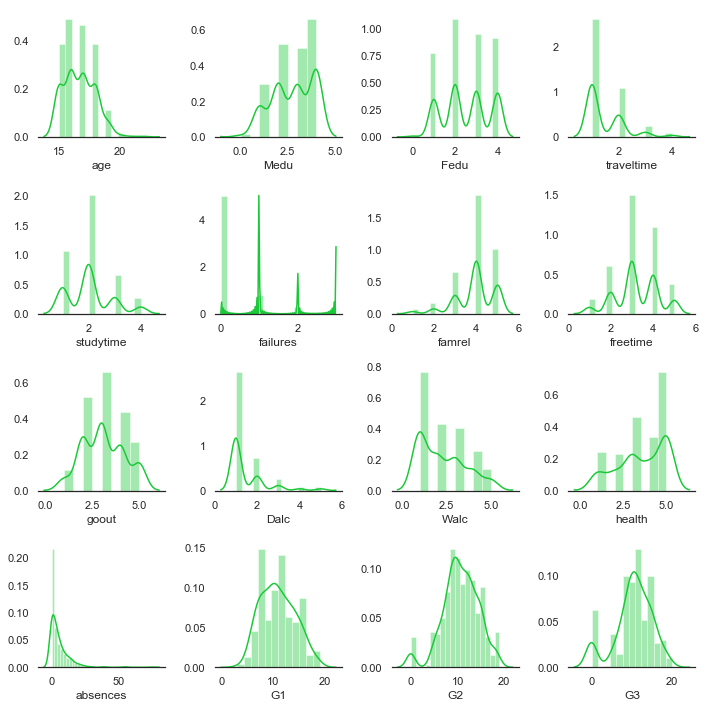

In [24]:
#Check distributions of the numeric variables
sns.set(style="white", palette="bright", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(10,10))
sns.despine(left=True)
sns.distplot(math['age'], kde=True, color ="g", ax=axes[0, 0])
sns.distplot(math['Medu'], kde=True, color="g", ax=axes[0, 1])
sns.distplot(math['Fedu'], kde=True, color="g", ax=axes[0, 2])
sns.distplot(math['traveltime'], kde=True, color="g", ax=axes[0, 3])
sns.distplot(math['studytime'], kde=True, color="g", ax=axes[1, 0])
sns.distplot(math['failures'], kde=True, color="g", ax=axes[1, 1])
sns.distplot(math['famrel'], kde=True, color="g", ax=axes[1, 2])
sns.distplot(math['freetime'], kde=True, color="g", ax=axes[1, 3])
sns.distplot(math['goout'], kde=True, color="g", ax=axes[2, 0])
sns.distplot(math['Dalc'], kde=True, color="g", ax=axes[2, 1])
sns.distplot(math['Walc'], kde=True, color="g", ax=axes[2, 2])
sns.distplot(math['health'], kde=True, color="g", ax=axes[2, 3])
sns.distplot(math['absences'],  kde=True, color="g", ax=axes[3, 0])
sns.distplot(math['G1'],        kde=True, color="g", ax=axes[3, 1])
sns.distplot(math['G2'],        kde=True, color="g", ax=axes[3, 2])
sns.distplot(math['G3'],        kde=True, color="g", ax=axes[3, 3])
plt.tight_layout()

A few of these have slightly uneven distributions worth mentioning and exploring.
- places where the distribution seems a little uneven
 - mother's education is slightly skewed toward higher education
 - traveltime is skewed toward one hour or less
 - studytime around 2 hours
 - good family relationships
 - low weekday and weekend alcohol consumption
 - good health
 - G1 skewed more toward failures but shifts more evenly at G2 and mostly evens out at G3 with the exception of a tiny jump in the very lowest of grades
 
Based on correlation map and distplot, we'll do some visualizations on 
- mother's education/performance
- traveltime and studytime
- weekend & weekday alcohol consumption /performance
- mother's education & father's education /performance
- health

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

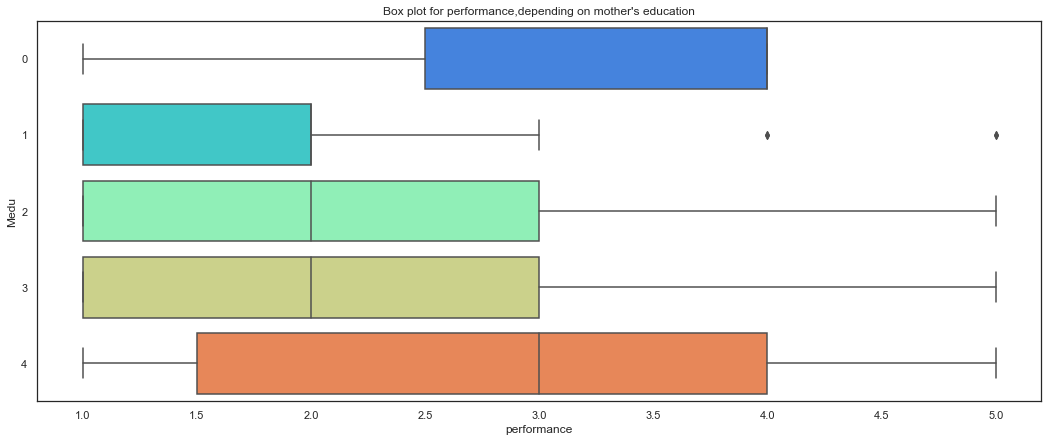

In [17]:
#Mother's education
plt.figure(figsize=(18,7))
plt.title("Box plot for performance,depending on mother's education")
sns.boxplot(y="Medu", x="performance",data = math , orient="h", palette = 'rainbow')

#Get exact counts of Medu
math['Medu'].value_counts()

The distribution is larger across the performance results of kids whose mother's have a higher eduation. If anything, this plot seems to show that kids with higher performance scores have mothers with no education or higher education over kids with mothers who have a 4th grade, 5th-9th grade, or secondary education. Kids with the lowest performance scores have mothers with only a 4th grade education whereas kids with mothers with 5th-9th grade education and secondary education have an equal performance score.

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

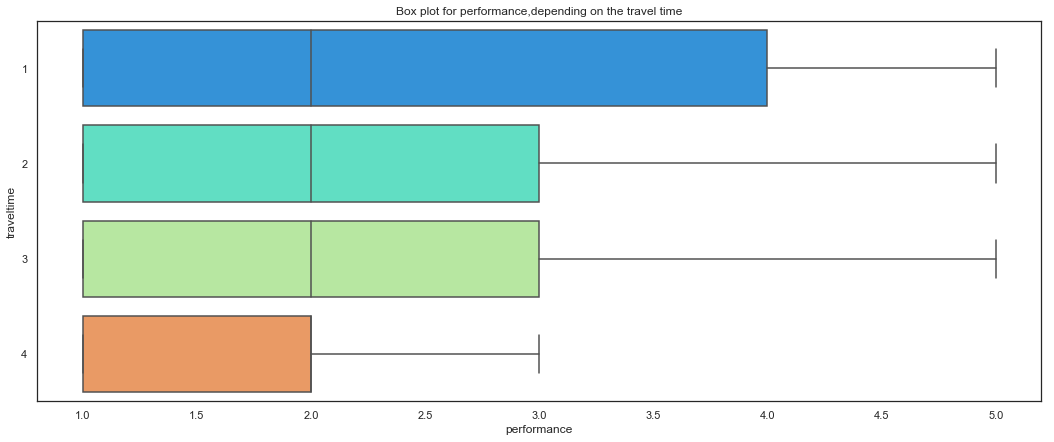

In [241]:
#Travel time
plt.figure(figsize=(18,7))
plt.title("Box plot for performance,depending on the travel time")
sns.boxplot(y="traveltime", x="performance",data = math, orient="h", palette = 'rainbow')

#Get exact counts of travel time
math['traveltime'].value_counts()

Students with 1, 2, and 3 hours of travel time have the same median performance scores. There is a larger spread across student performance if there is 1 hour or less of travel time. Do they use the time to study?

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

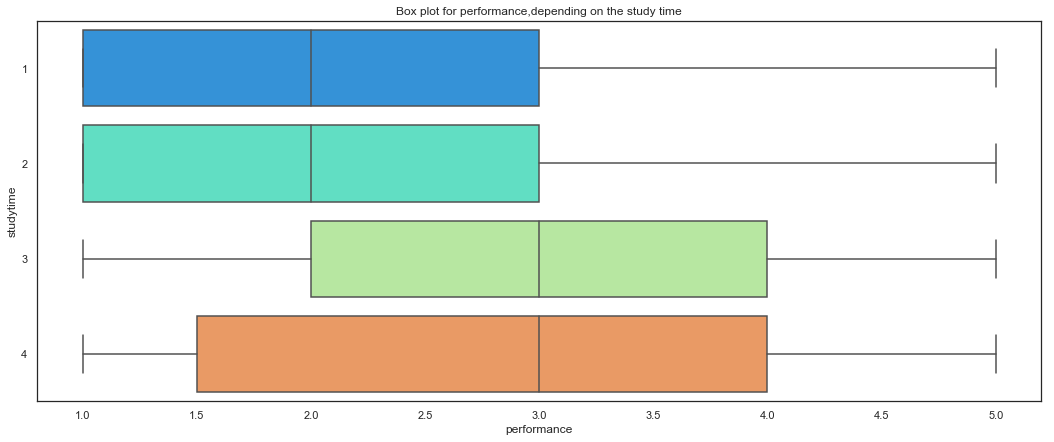

In [243]:
#Study time
plt.figure(figsize=(18,7))
plt.title("Box plot for performance,depending on the study time")
sns.boxplot(y="studytime", x="performance",data = math , orient="h", palette = 'rainbow')

#Get exact counts of study time
math['studytime'].value_counts()

This is not shocking. Students who spend more time (3= 5-10 hours; 4= >10 hours) studying have higher average performance results, but the distribution of min/max is highest amongst the students who spend more than 10 hour studying. (None of the highest two study groups failed, though.) It's worth noting that there are significantly fewer students in these latter two groups. 

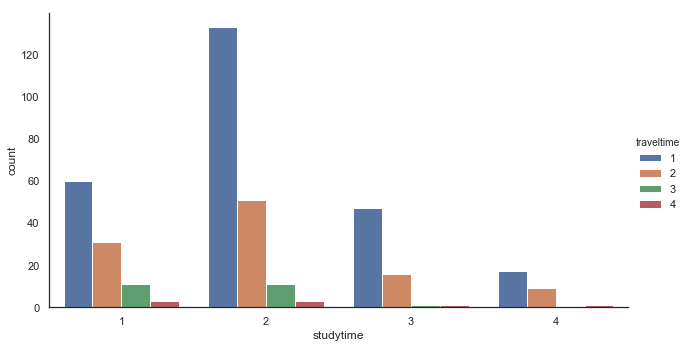

In [253]:
# plot to see how studytime/traveltime compare
ms = sns.catplot('studytime', data=math, hue= 'traveltime', 
                    kind='count', aspect =1.75)
ms.set_xlabels('studytime')

While it's true that students with 1hr or less of travel time study more, most of the students with that short travel time only study 2-5 hours per week. From the previous boxplot, we know that this group's median performance score is a D (2).

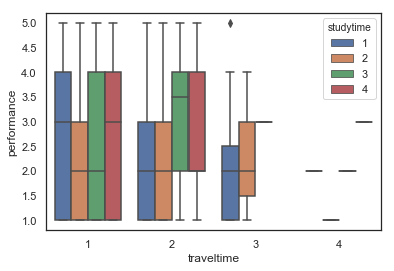

In [79]:
#one more check on travel time and study time in relation to performance
sns.set(style="white")
sns.boxplot(x="traveltime",y="performance",hue="studytime", data=math)
plt.show()

   - 1hr or less of travel time
       - students who study less than 2 hours or more than 10 hours have the same grade distribution and median scores.
       - students who study between 2-5 hours and 5-10 hours have the same median performance scores though there is a larger min/max difference between the latter group. 
   - 2 hours of travel time 
       - students who study less than 2 hours and between 2-5 hours have the same median performance scores and the same min/max. 
       - students who study between 5-10 hours and more than 10 hours have similar grade performance scores. 
   - 3 hours of travel time
        - these students have the same median performance score regardless of study time though the students who study 2-5 hours skew better grades than students who study less than two hours. 

4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64

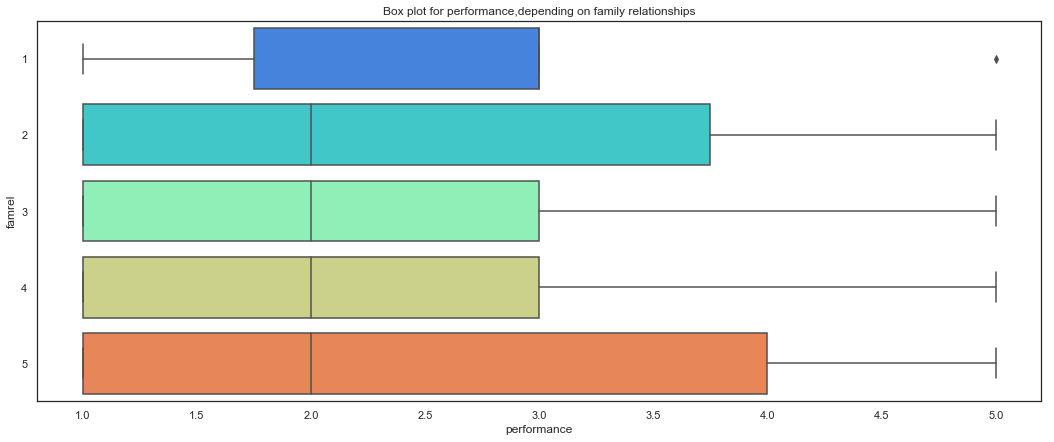

In [26]:
# family relationships
plt.figure(figsize=(18,7))
plt.title("Box plot for performance,depending on family relationships")
sns.boxplot(y="famrel", x="performance",data = math , orient="h", palette = 'rainbow')

#Get exact counts of quality of family relationships
math['famrel'].value_counts()

The absolute numbers show that the majority do students have good family relationships so we should not try to draw generalizations from this plot.

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

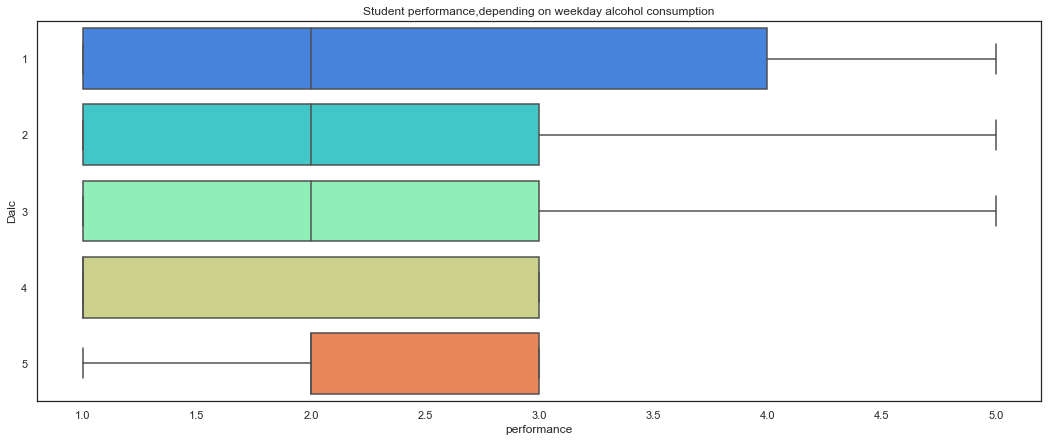

In [259]:
#Weekday alcohol consumption and performance
plt.figure(figsize=(18,7))
plt.title("Student performance,depending on weekday alcohol consumption")
sns.boxplot(y="Dalc", x="performance",data = math , orient="h", palette = 'rainbow')

#Get exact counts of Dalc
math['Dalc'].value_counts()

89% of the students report low (1 or 2) levels of weekday alcohol consumption. Students with low to medium (1-3) levels of weekday alcohol consumption have the same median grade performance (D). These students make up so much of the data that we cannot infer that weekday alcohol has anything to do with grade performance. 

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

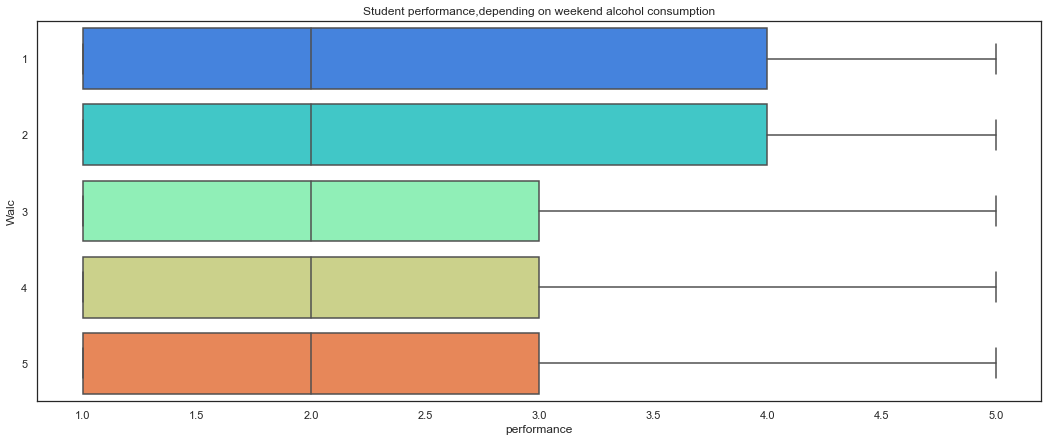

In [260]:
#Weekend alcohol consumption and performance
plt.figure(figsize=(18,7))
plt.title("Student performance,depending on weekend alcohol consumption")
sns.boxplot(y="Walc", x="performance",data = math , orient="h", palette = 'rainbow')

#Get exact counts of Walc
math['Walc'].value_counts()

60% of the students report low (1 or 2) levels of weekend alcohol consumption. The median performance score is the same regardless of the level of alcohol consumption. The absolute numbers in this data are too skewed to make any inferences from this plot.

5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64

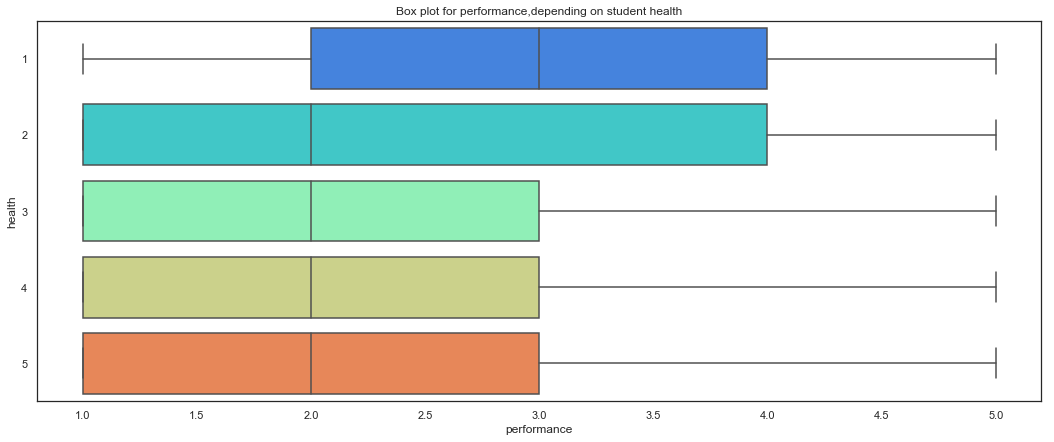

In [220]:
#student health
plt.figure(figsize=(18,7))
plt.title("Box plot for performance,depending on student health")
sns.boxplot(y="health", x="performance",data = math , orient="h", palette = 'rainbow')
math['health'].value_counts()

Students in bad health (1) have a full letter grade higer median grade performance value than students who are healthier. The other students have the same median performance score regardless of their health status. Students in fair to good health (3-5) make up 77% of the data.

Let's take a look at a some of categorical features that look a little uneven in more detail and in relative terms

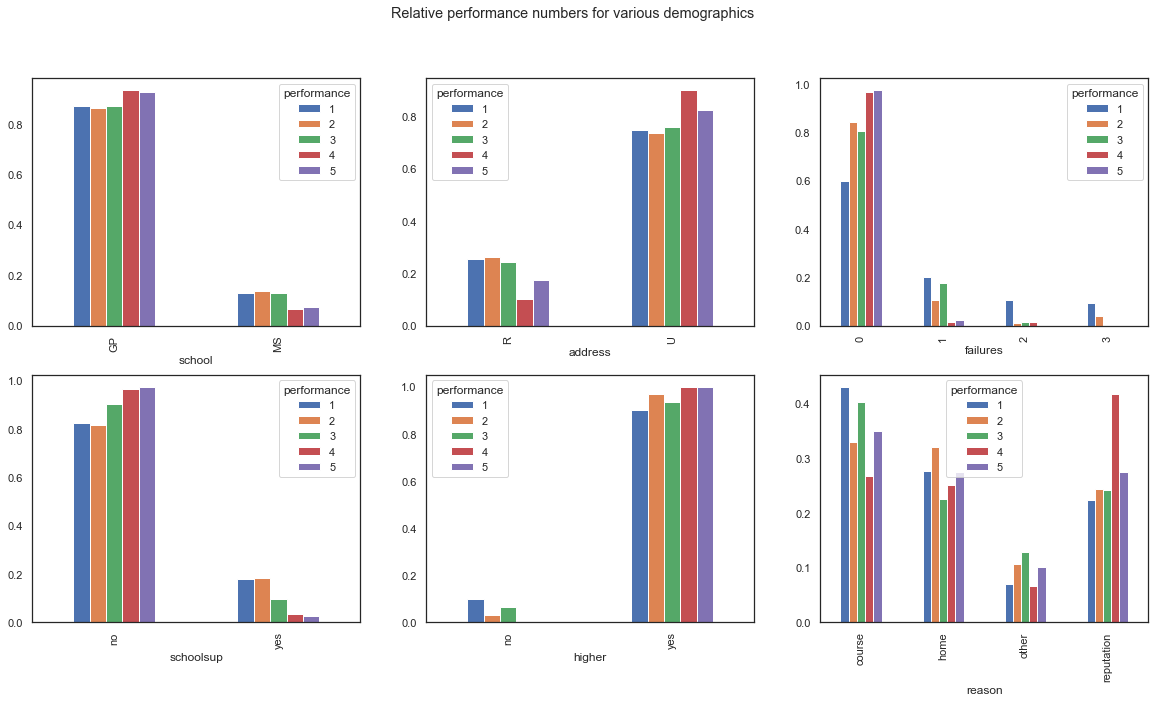

In [36]:
#stats relative to population
fig, ax = plt.subplots(2,3)
fig.set_size_inches(20,10)
fig.suptitle('Relative performance numbers for various demographics')

d = math.groupby(['school', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0,0])

d = math.groupby(['address', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0,1])

d = math.groupby(['failures', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0,2])

d = math.groupby(['schoolsup', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1,0])

d = math.groupby(['higher', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1,1])

d = math.groupby(['reason', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1,2])

plt.savefig('relativenumbers')

These relative numbers show a little less variance in the distributions of performance by the x values with the exception of failures, school support, and reason. There are more students who have no failures and no school support, but their performance scores seems to have a bit wider distribution. 

performance,1,2,3,4,5
failures,,,,,
0,78,87,50,58,39
1,26,11,11,1,1
2,14,1,1,1,0
3,12,4,0,0,0


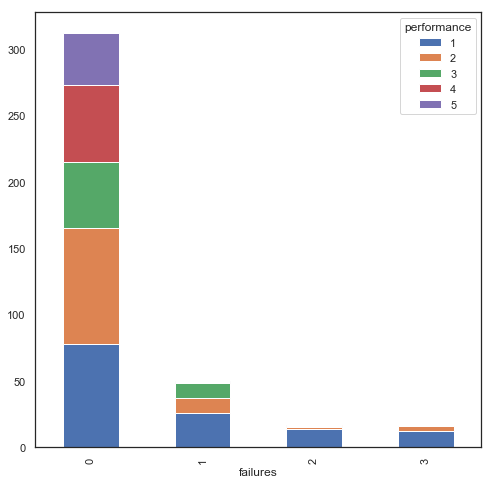

In [28]:
failures_color_table = pd.crosstab(index=math["failures"], 
                          columns=math["performance"])
failures_color_table.plot(kind="bar", figsize=(8,8),stacked=True)
failures_color_table

Looking at the failures in this stacked bar chart looks less suspicious now. 

performance,1,2,3,4,5
schoolsup,,,,,
yes,23,19,6,2,1
no,107,84,56,58,39


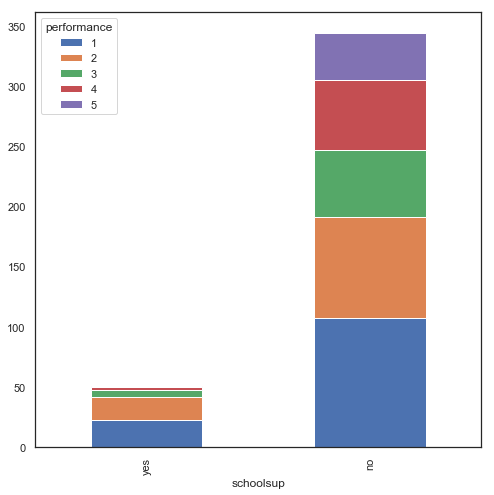

In [29]:
schoolsup_color_table = pd.crosstab(index=math["schoolsup"], 
                          columns=math["performance"])
schoolsup_color_table.plot(kind="bar", figsize=(8,8),stacked=True)
schoolsup_color_table

Looking at the school support feature in this stacked bar chart looks less suspicious now.

performance,1,2,3,4,5
reason,,,,,
course,56,34,25,16,14
other,9,11,8,4,4
home,36,33,14,15,11
reputation,29,25,15,25,11


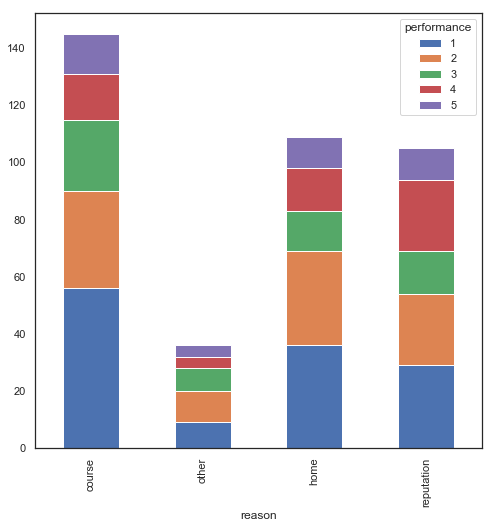

In [38]:
reason_color_table = pd.crosstab(index=math["reason"], 
                          columns=math["performance"])
reason_color_table.plot(kind="bar", figsize=(8,8),stacked=True)
reason_color_table

The numbers look a little less skewed now for each reason type. 

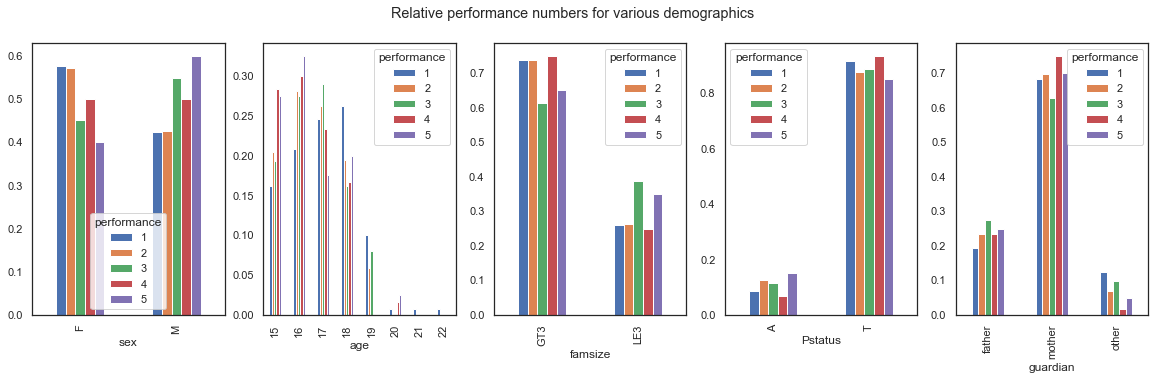

In [30]:
#stats relative to population
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,5)
fig.suptitle('Relative performance numbers for various demographics')

d = math.groupby(['sex', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = math.groupby(['age', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = math.groupby(['famsize', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = math.groupby(['Pstatus', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

d = math.groupby(['guardian', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[4])

plt.savefig('relativenumbers')

These relative numbers don't really show too much unclear variance in the distributions of performance by the x values. I will take a quick look at sex and age just to make sure there's not something I'm missing. 

performance,1,2,3,4,5
sex,,,,,
F,75,59,28,30,16
M,55,44,34,30,24


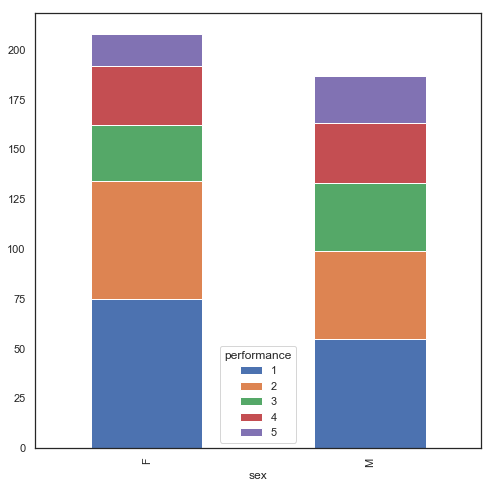

In [239]:
sex_color_table = pd.crosstab(index=math["sex"], 
                          columns=math["performance"])
sex_color_table.plot(kind="bar", figsize=(8,8),stacked=True)
sex_color_table

The relative numbers of each performance score seem fairly even amongst each gender though females are skewed more toward lower performance scores. 

performance,1,2,3,4,5
age,,,,,
15,21,21,12,17,11
16,27,29,17,18,13
17,32,27,18,14,7
18,34,20,10,10,8
19,13,6,5,0,0
20,1,0,0,1,1
21,1,0,0,0,0
22,1,0,0,0,0


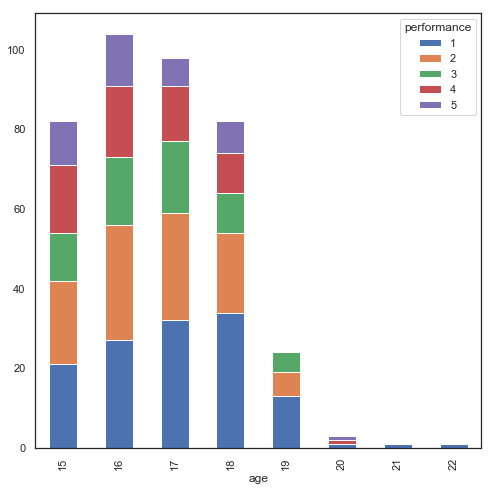

In [235]:
age_color_table = pd.crosstab(index=math["age"], 
                          columns=math["performance"])
age_color_table.plot(kind="bar", figsize=(8,8),stacked=True)
age_color_table

This does not look unexpected. There are relatively less failures the younger the studetn is but the other performance values are similar on a relative scale.

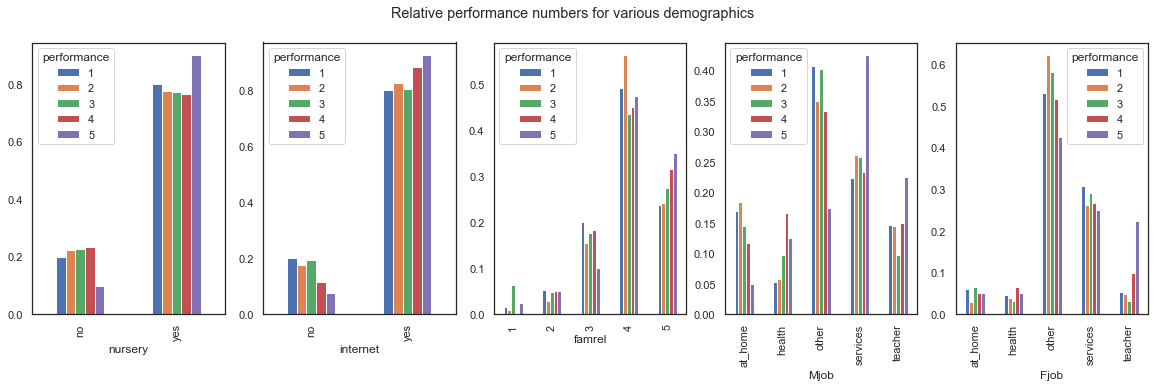

In [31]:
#stats relative to population
fig, ax = plt.subplots(1,5)
fig.set_size_inches(20,5)
fig.suptitle('Relative performance numbers for various demographics')

d = math.groupby(['nursery', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = math.groupby(['internet', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = math.groupby(['famrel', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = math.groupby(['Mjob', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

d = math.groupby(['Fjob', 'performance']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[4])

plt.savefig('relativenumbers')

There's an odd jump in students who earned an A who went to nursery school and the opposite happend to students who did not go to nursery school. This same thing happens (though on a smaller scale) for students who have internet access at home versus those who do not. 
There seems to be a bit of variance in grade performance within mother job type and father's job type. I'll check the absolute numbers on those before determining whehter or not to produce more visualizations.  

In [32]:
mjob_color_table = pd.crosstab(index=math["Mjob"], 
                          columns=math["performance"])
mjob_color_table

performance,1,2,3,4,5
Mjob,,,,,
at_home,22,19,9,7,2
health,7,6,6,10,5
other,53,36,25,20,7
services,29,27,16,14,17
teacher,19,15,6,9,9


In relative numbers, there are more students with mother's whose jobs are "other" or in the service industry who fail or perform poorly compared to other job types. 

In [33]:
fjob_color_table = pd.crosstab(index=math["Fjob"], 
                          columns=math["performance"])
fjob_color_table

performance,1,2,3,4,5
Fjob,,,,,
teacher,7,5,2,6,9
other,69,64,36,31,17
services,40,27,18,16,10
health,6,4,2,4,2
at_home,8,3,4,3,2


In relative numbers, there are more students with father's whose jobs are "other" or in the service industry who fail or perform poorly compared to other job types. This trend is similar to the trend for mother's job.

In [66]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,performance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,2


<a id='features'>
## Feature Selection for modeling with categorical features</a>
- modify the data set in order to handle categorical features
    - get_dummies
    - integer encoding
- split data sets into train/test for modeling

In [119]:
#Convert to categorical for later model building
for col in ['Medu', 'Fedu', 'famrel','freetime', 'goout', 'Dalc', 'Walc', 'health']:
    math[col] = math[col].astype('category')

In [57]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,performance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,2


#### Use get_dummies for categorical features

In [58]:
#Get dummies for non numeric categorical features
pd.get_dummies(math) 

math_dummy = pd.get_dummies(math) 
math_dummy.head()

,age,traveltime,studytime,failures,absences,G1,G2,G3,performance,school_GP,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,18,2,2,0,6,5,6,6,1,1,...,1,0,0,0,0,0,0,1,0,0
1,17,1,2,0,4,5,5,6,1,1,...,1,0,0,0,0,0,0,1,0,0
2,15,1,2,3,10,7,8,10,2,1,...,0,0,1,0,0,0,0,1,0,0
3,15,1,3,0,2,15,14,15,4,1,...,1,0,0,0,0,0,0,0,0,1
4,16,1,2,0,4,6,10,10,2,1,...,0,1,0,0,0,0,0,0,0,1


In [117]:
math_dummy.iloc[:,[26, 35,45,47,59, 65, 71, 80]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
Fedu_3          395 non-null uint8
Fjob_other      395 non-null uint8
schoolsup_no    395 non-null uint8
famsup_no       395 non-null uint8
romantic_no     395 non-null uint8
famrel_5        395 non-null uint8
goout_1         395 non-null uint8
Dalc_5          395 non-null uint8
dtypes: uint8(8)
memory usage: 3.2 KB


#### Integer encode categorical features

In [41]:
mod_df = math 
binaryYesNo = {'yes': 2, 'no': 1}
school_map  = {'MS': 1, 'GP': 2}
sex_map     = {'M': 1, 'F': 2}
address_map = {'R':1, 'U':2}
famsize_map = {'LE3':1, 'GT3':2}
pstatus_map = {'A':1, 'T':2}
mjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

fjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

reason_map   = {'course':1, 'other':2, 'reputation':3, 'home':4}
guardian_map = {'other':1, 'father':2, 'mother':3}

mod_df.schoolsup  = mod_df.schoolsup.map(binaryYesNo)
mod_df.famsup     = mod_df.famsup.map(binaryYesNo)
mod_df.paid       = mod_df.paid.map(binaryYesNo)
mod_df.activities = mod_df.activities.map(binaryYesNo)
mod_df.nursery    = mod_df.nursery.map(binaryYesNo)
mod_df.higher     = mod_df.higher.map(binaryYesNo)
mod_df.internet   = mod_df.internet.map(binaryYesNo)
mod_df.romantic   = mod_df.romantic.map(binaryYesNo)

mod_df.school   = mod_df.school.map(school_map)
mod_df.sex      = mod_df.sex.map(sex_map)
mod_df.address  = mod_df.address.map(address_map)
mod_df.famsize  = mod_df.famsize.map(famsize_map)
mod_df.Pstatus  = mod_df.Pstatus.map(pstatus_map)
mod_df.Mjob     = mod_df.Mjob.map(mjob_map)
mod_df.Fjob     = mod_df.Fjob.map(fjob_map)
mod_df.reason   = mod_df.reason.map(reason_map)
mod_df.guardian = mod_df.guardian.map(guardian_map)

In [42]:
mod_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,pass,performance
0,2,2,18,2,2,1,4,4,4,5,...,4,1,1,3,6,5,6,6,1,1
1,2,2,17,2,2,2,1,1,4,3,...,3,1,1,3,4,5,5,6,1,1
2,2,2,15,2,1,2,1,1,4,3,...,2,2,3,3,10,7,8,10,2,2
3,2,2,15,2,2,2,4,2,2,1,...,2,1,1,5,2,15,14,15,2,4
4,2,2,16,2,2,2,3,3,3,3,...,2,1,2,5,4,6,10,10,2,2


### Split data into train/test

#### Original dataset

In [100]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school         395 non-null int64
sex            395 non-null int64
age            395 non-null int64
address        395 non-null int64
famsize        395 non-null int64
Pstatus        395 non-null int64
Medu           395 non-null object
Fedu           395 non-null object
Mjob           395 non-null int64
Fjob           395 non-null int64
reason         395 non-null int64
guardian       395 non-null int64
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null int64
famsup         395 non-null int64
paid           395 non-null int64
activities     395 non-null int64
nursery        395 non-null int64
higher         395 non-null int64
internet       395 non-null int64
romantic       395 non-null int64
famrel         395 non-null object
freetime       395 non-null object
goout          395 non-null object
Dalc  

In [43]:
#not binary features
mod_df = mod_df.drop(["pass"], axis = 1) #I created this column for some of the graphs

In [44]:
#drop G3 since it was used to create y variable and has high correlation to both Y variable & G2
mod_df = mod_df.drop(["G3"], axis = 1) #I created this column for some of the graphs

In [45]:
#Convert to y variable to categorical
mod_df['performance'] = mod_df['performance'].astype('category')

In [46]:
#binarize y variable
y = label_binarize(mod_df['performance'], classes = [0,1,2,3,4])

In [47]:
# Split features(predictors) & target (performance)
X = mod_df.drop(columns=['performance'])
y = mod_df[['performance']].astype('category')

In [48]:
# split the rows into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
     test_size=0.3, random_state=123)
print("Training Rows: {} \nTest Rows: {}".format(len(X_train), len(X_test)))

Training Rows: 276 
Test Rows: 119


#### Dummified dataset

In [29]:
#remove this feature from dataset
math_dummy = math_dummy.drop(["pass"], axis = 1) #I created this column for some of the graphs

In [60]:
#drop G3 since it was used to create y variable and has high correlation to both Y variable & G2
math_dummy = math_dummy.drop(["G3"], axis = 1) #I created this column for some of the graphs

In [61]:
#Convert to y variable to categorical
math_dummy['performance'] = math_dummy['performance'].astype('category')

In [62]:
#binarize y variable
y_dum = label_binarize(math_dummy['performance'], classes = [0,1,2,3,4])

In [63]:
# Split features(predictors) & target (performance)
X_dum = math_dummy.drop(columns=['performance'])
y_dum = math_dummy[['performance']].astype('category')

In [64]:
# split the rows into train and test
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dum, y_dum,
     test_size=0.3, random_state=123)
print("Training Rows: {} \nTest Rows: {}".format(len(X_train_dum), len(X_test_dum)))

Training Rows: 276 
Test Rows: 119


In [65]:
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(X_train_dum, y_train_dum)  
test_features = feature_scaler.transform(X_test_dum, y_test_dum)  

/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/jenny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:737: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/jenny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
# Check the first 5 rows of the data frame
X_train_dum.head()

,age,traveltime,studytime,failures,absences,G1,G2,school_GP,school_MS,sex_F,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
5,16,1,2,0,10,15,15,1,0,0,...,0,1,0,0,0,0,0,0,0,1
240,17,2,2,0,14,12,12,1,0,0,...,0,0,0,1,0,0,0,0,0,1
241,17,2,2,0,2,10,11,1,0,0,...,0,0,1,0,0,0,0,0,1,0
19,16,1,1,0,4,8,10,1,0,0,...,0,0,1,0,0,0,0,0,0,1
29,16,1,2,0,16,10,12,1,0,0,...,0,0,0,0,1,0,0,0,0,1


<a id='Modeling'>
## Build Models</a>

In [111]:
# Create a list of the different classifiers to test
clfs = {
'RandomForest': RandomForestClassifier(n_estimators=100),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(gamma='scale'),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier()
}

### Models w/ original dataset with integer encoding

In [112]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 
                                        'Recall_score','F1_score', 'Kappa', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, 
                                                                y_pred,average='weighted'),
                     'Recall_score': metrics.recall_score(y_test, y_pred, 
                                                          average='weighted'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='weighted'),
                     'Kappa': metrics.cohen_kappa_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,RandomForest,0.699640,0.672269,0.653354,0.576706,0.672269
1,DecisionTreeClassifier,0.612464,0.621849,0.609551,0.512783,0.621849
2,SVM,0.706168,0.672269,0.667331,0.578359,0.672269
3,KNeighborsClassifier,0.651551,0.621849,0.610793,0.511093,0.621849
4,GradientBoosting,0.689247,0.680672,0.677866,0.588946,0.680672


### Models with dummified data

In [114]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 
                                        'Recall_score','F1_score', 'Kappa', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train_dum,y_train_dum.values.ravel())
    y_pred = clf.predict(X_test_dum)
    y_score = clf.score(X_test_dum,y_test_dum.values.ravel())
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test_dum.values.ravel(), 
                                                                y_pred, average='weighted'),
                     'Recall_score': metrics.recall_score(y_test_dum.values.ravel(), 
                                                          y_pred, average='weighted'),
                     'F1_score': metrics.f1_score(y_test_dum.values.ravel(), y_pred, average='weighted'),
                     'Kappa': metrics.cohen_kappa_score(y_test_dum.values.ravel(), y_pred),
                     'Accuracy': metrics.accuracy_score(y_test_dum.values.ravel(), y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Kappa,Accuracy
0,RandomForest,0.596855,0.579832,0.541923,0.453477,0.579832
1,DecisionTreeClassifier,0.569739,0.579832,0.564366,0.458056,0.579832
2,SVM,0.707538,0.663866,0.652497,0.566918,0.663866
3,KNeighborsClassifier,0.659723,0.647059,0.640224,0.545760,0.647059
4,GradientBoosting,0.705787,0.705882,0.700415,0.621845,0.705882


<blockquote> None of these models look super strong, but the best performing models are the Gradiant Boosting and SVM on models with dummy data.

<a id='tuning'>
## Parameter Tuning, Model Fitting, and Cross Validation</a>

In [102]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,X_train_dum, X_test_dum, y_train_dum, y_test_dum, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold, iid="Boolean")
    gs.fit(X_train_dum, y_train_dum)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(X_test_dum, y_test_dum))

# Function to generate confusion matrix
def conmat(pred, y_test_dum):
    conmat = np.array(confusion_matrix(y_test_dum, pred))
    cm_df = pd.DataFrame(conmat, index=['F', 'D', 'C', 'B', 'A'],
                             columns=['F', 'D', 'C', 'B', 'A'])

    print (cm_df)
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('\nAccuracy:{0:.3f}'.format(accuracy_score(y_test_dum, pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def model(md, X_train_dum, y_train_dum, X_test_dum, y_test_dum):
    md.fit(X_train_dum, y_train_dum)
    pred = md.predict(X_test_dum)
    prob = md.predict_proba(X_test_dum)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(X_train_dum, y_train_dum))
    print ('Accuracy on Test set: ', md.score(X_test_dum, y_test_dum))
    print (' ')
    print(classification_report(y_test_dum, pred))
    print (' ')
    print ('Confusion Matrix')
    conmat(pred, y_test_dum)
    print ('Accuracy of predicted Y:' ,accuracy_score(y_test_dum, pred))
    print ('Kappa of predicted Y:' ,cohen_kappa_score(y_test_dum, pred))
    return md

#### Gradient Boosting 

In [103]:
gb = GradientBoostingClassifier(random_state=123)

In [104]:
# Tune parameters on Gradient Boosting
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1], 'max_depth' : [2, 3, 5, 7],
             'min_samples_leaf' :[1, 2, 3, 5]}
gridsearch(gb, gb_params,X_train_dum, X_test_dum, 
           y_train_dum.values.ravel(), y_test_dum.values.ravel(), 5)

Best params:  {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 200}
Best AUC on Train set:  0.7789855072463768
Best AUC on Test set:  0.7310924369747899


 
Accuracy on Train set:  0.8152173913043478
Accuracy on Test set:  0.7310924369747899
 
              precision    recall  f1-score   support

           1       0.79      0.97      0.87        34
           2       0.59      0.57      0.58        28
           3       0.65      0.57      0.60        23
           4       0.75      0.79      0.77        19
           5       1.00      0.67      0.80        15

   micro avg       0.73      0.73      0.73       119
   macro avg       0.76      0.71      0.72       119
weighted avg       0.74      0.73      0.73       119

 
Confusion Matrix
    F   D   C   B   A
F  33   1   0   0   0
D   9  16   3   0   0
C   0  10  13   0   0
B   0   0   4  15   0
A   0   0   0   5  10


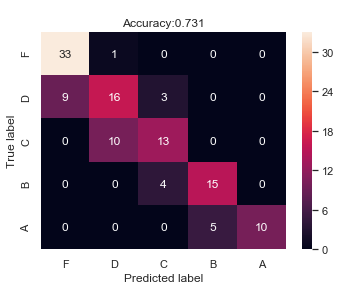

Accuracy of predicted Y: 0.7310924369747899
Kappa of predicted Y: 0.6534085737689997


In [106]:
# Fit best params, cross validate, evaluate model 
gb = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 2,
                                n_estimators=200, min_samples_leaf = 5)
model_gb = model(gb, X_train_dum, y_train_dum.values.ravel(), 
                 X_test_dum, y_test_dum.values.ravel())

<b>Model Interpretation:</b><br>
- Accuracy: 73% of the model's predictions are correct. 
- Kappa: The classifier achieved a rate of classifcation between the observed accuracy and the expected accuracy at a rate of 65%. This is a little on the low side. 
- Precision: The weighted average of the precision at each class is 74%. 
- Recall: The weighted average of the recall (sensitivity)  at each class is 73%.
- F1 Score: The weighted average of the precision and recall scores at each class is 73%. 

#### SVM 

In [85]:
svm= SVC(random_state=123)

In [86]:
# Tune parameters on SVM
svm_params = {'kernel': ['linear', 'rbf'],'C' : [1,2,3,4,5,6,7,8,9,10], 'degree' : [1, 3, 5],
             'gamma': [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
gridsearch(svm, svm_params,X_train_dum, X_test_dum, 
           y_train_dum.values.ravel(), y_test_dum.values.ravel(),5)

Best params:  {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best AUC on Train set:  0.6811594202898551
Best AUC on Test set:  0.6974789915966386


 
Accuracy on Train set:  0.8442028985507246
Accuracy on Test set:  0.6974789915966386
 
              precision    recall  f1-score   support

           1       0.88      0.85      0.87        34
           2       0.55      0.75      0.64        28
           3       0.62      0.43      0.51        23
           4       0.64      0.84      0.73        19
           5       1.00      0.47      0.64        15

   micro avg       0.70      0.70      0.70       119
   macro avg       0.74      0.67      0.68       119
weighted avg       0.73      0.70      0.69       119

 
Confusion Matrix
    F   D   C   B  A
F  29   5   0   0  0
D   4  21   3   0  0
C   0  12  10   1  0
B   0   0   3  16  0
A   0   0   0   8  7


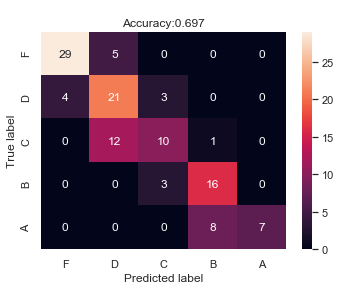

Accuracy of predicted Y: 0.6974789915966386
Kappa of predicted Y: 0.6114990477917839


In [116]:
# Fit best params, cross validate, evaluate model 
svm = SVC(C= 1, degree= 1,gamma=.01, kernel = 'rbf', probability =True)
model_svm = model(svm, X_train_dum, y_train_dum.values.ravel(),X_test_dum, y_test_dum.values.ravel())

<b>Model Interpretation:</b><br>
- Accuracy: 70% of the model's predictions are correct. 
- Kappa: The classifier achieved a rate of classifcation between the observed accuracy and the expected accuracy at a rate of 61%. 
- Precision: The weighted average of the precision at each class is 74%. 
- Recall: The weighted average of the recall (sensitivity)  at each class is 70%.
- F1 Score: The weighted average of the precision and recall scores at each class is 69%. 

<b>Best Model: Gradient Boosting Model</b> <br>
It had the highest accuracy and kappa score in cross validation of predictions, and it also had the strongest precision, recall, and F1 score.

#### Look at Feature Importance for Gradient Boosting Model

[0.00025257 0.00197371 0.00016889 0.00028777 0.00292501]


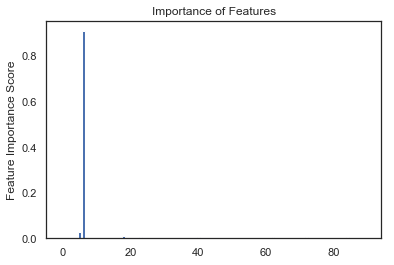

In [77]:
# feature importance
print(gb.feature_importances_[:5])#see first 5 most important features
# plot
pyplot.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
plt.title('Importance of Features')
plt.ylabel('Feature Importance Score')
pyplot.show()

<a id='conclude'>
## Conclusions</a>

There are no features within the data set that are strongly important to the model. This finding is in line with  what I've seen others who worked with this data set have found in their modeling. It seems that there are not enough of the right attributes or right relationships between attributes to build highly accurate (>80%) models. All in all, I learned a lot from this project and am happy with the results I came up with.  <br>
In looking back over the project, I would have liked to have had time to look at the Portuguese class data set independently and together with this data set. They represent many of the same students, yet language classes and math classes are very different and it would have been interesting to see where they converge and where they do not. I also would have liked to have approached this as a binary classification problem (pass/fail) but when I did a little testing on that, almost %70 of the students in the data set passed the class so the models suffered from overfit. Finally, I would have liked to have also approached this as a regression problem and modeling predicting the actual final score (G3) rather than engineering the dependant variable into a letter grade. 